# HSE / Systems biology and personalized medicine course/ HW2 ~ Enrichment analysis / RUS-ENG 

**Gene set enrichment analysis (GSEA) (also called functional enrichment analysis or pathway enrichment analysis)** is a method to identify classes of genes or proteins that are over-represented in a large set of genes or proteins, and may have an association with disease phenotypes. 

___________________
Teacher's notes: "Будем работать с данными по экспрессии. У нас есть данные по экспрессии, информация о генах и 
образцах ('expr.tsv', 'genes.tsv' и 'anno.tsv').

Из 'anno.tsv' можно понять, к какому классу (норма или опухоль) относится 
образец".

In [1]:
!wget https://www.dropbox.com/s/x1nanggkhfyw00c/GSE23878_norm.zip?dl=0 -O data.zip
!mkdir data
!unzip data.zip -d data
#!rm data.zip

--2022-11-16 23:38:46--  https://www.dropbox.com/s/x1nanggkhfyw00c/GSE23878_norm.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/x1nanggkhfyw00c/GSE23878_norm.zip [following]
--2022-11-16 23:38:47--  https://www.dropbox.com/s/raw/x1nanggkhfyw00c/GSE23878_norm.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce45678358ed121353a3e30db22.dl.dropboxusercontent.com/cd/0/inline/Bw5wzShx6Ff08rIieHDKxJeW7UXQlFP3xvzIYWY34hrE_CouShzn9icZi3g0KvnQaMhcdd9ncD5lgs5yK-AGlwDcD3j_DqSSmyN21DhDtQkghsy_rq-YJJDodK-e_FOq-paM9QM0pAkzPIQr6oxj9HUNV_4GQvI5ktFH9n1rMhoF5w/file# [following]
--2022-11-16 23:38:47--  https://uce45678358ed121353a3e30db22.dl.dropboxusercontent.com/cd/0/inline/Bw5wzShx6Ff08rIieHDKxJeW7UXQlFP3xvzIYWY34hrE_CouShzn9icZi3g0

## Data import and preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
annotation = pd.read_csv('data/anno.tsv', sep='\t')
print(annotation.shape)
annotation.head(2)

(58, 32)


,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,contact_department,contact_institute,contact_address,contact_city,contact_state,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,gender:ch1
0,CC2,GSM588828,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male
1,CC3,GSM588829,Public on Aug 31 2010,Aug 30 2010,Aug 30 2010,RNA,1,colon tumour,Homo sapiens,gender: Male,...,HUMAN CANCER GENOMIC,KING FAISAL SPECIALIST HOSPITAL & RESEARCH CENTER,"MBC 98-16, PO BOX 3354",RIYADH 11211,KSA,11211,Saudi Arabia,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM588n...,54675,Male


In [4]:
expression = pd.read_csv('data/expr.tsv', sep='\t')
print(expression.shape)
expression.head(2)

(19756, 58)


,GSM588828,GSM588829,GSM588830,GSM588831,GSM588832,GSM588833,GSM588834,GSM588835,GSM588836,GSM588837,...,GSM588877,GSM588878,GSM588879,GSM588880,GSM588881,GSM588882,GSM588883,GSM588884,GSM588885,GSM588886
0,4.133779,4.195093,3.981460,4.397206,4.111491,4.322267,4.702411,4.343087,4.580750,4.179001,...,3.870638,4.540533,4.309905,4.519285,4.427059,4.587475,4.498123,4.281139,4.498443,4.228814
1,6.928043,5.790547,7.176388,5.023986,5.062291,7.733216,7.103563,6.888509,2.011922,7.510507,...,8.519612,7.397365,6.637553,7.680953,5.821583,7.955098,6.002558,7.053275,7.511692,8.109734


In [5]:
genes = pd.read_csv('data/genes.tsv', sep='\t')
print(genes.shape)
genes.head(2)

(19756, 16)


,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,229819_at,AI022193,NaN,Homo sapiens,"Oct 6, 2014",Consensus sequence,GenBank,gb:AI022193 /DB_XREF=gi:3239546 /DB_XREF=ow92f...,AI022193,alpha-1-B glycoprotein,A1BG,1,NM_130786,NaN,0005576 // extracellular region // inferred fr...,0005515 // protein binding // inferred from el...
1,206797_at,NM_000015,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,gb:NM_000015.1 /DB_XREF=gi:4557782 /GEN=NAT2 /...,NM_000015,N-acetyltransferase 2 (arylamine N-acetyltrans...,NAT2,10,NM_000015,0006805 // xenobiotic metabolic process // tra...,0005737 // cytoplasm // inferred from electron...,0004060 // arylamine N-acetyltransferase activ...


In [6]:
# use inf. from genes df in expression df
expression.set_index(genes['Gene Symbol'], inplace = True)
expression.head()

,GSM588828,GSM588829,GSM588830,GSM588831,GSM588832,GSM588833,GSM588834,GSM588835,GSM588836,GSM588837,...,GSM588877,GSM588878,GSM588879,GSM588880,GSM588881,GSM588882,GSM588883,GSM588884,GSM588885,GSM588886
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.133779,4.195093,3.981460,4.397206,4.111491,4.322267,4.702411,4.343087,4.580750,4.179001,...,3.870638,4.540533,4.309905,4.519285,4.427059,4.587475,4.498123,4.281139,4.498443,4.228814
NAT2,6.928043,5.790547,7.176388,5.023986,5.062291,7.733216,7.103563,6.888509,2.011922,7.510507,...,8.519612,7.397365,6.637553,7.680953,5.821583,7.955098,6.002558,7.053275,7.511692,8.109734
ADA,5.436122,4.778579,5.938665,6.540153,5.498697,5.887690,5.434566,4.686246,5.599699,5.380077,...,4.394201,4.487075,5.514207,5.681542,5.054774,4.673883,4.518913,4.425299,4.200812,4.001112
CDH2,2.892430,1.663153,3.485304,2.837845,2.524734,3.412039,3.892142,3.220816,4.108645,3.365574,...,3.200994,3.599084,4.684521,3.937642,5.984184,4.305265,5.793236,3.611910,4.158352,3.779648
AKT3,3.340189,3.238030,2.398587,0.860390,3.680071,2.235755,4.304426,3.044746,4.451681,4.166952,...,3.735891,3.091286,4.757382,4.752151,4.520755,1.338718,3.762129,3.974924,4.091977,3.096955


Each sample record is assigned a unique and stable GEO accession number (GSMxxx). 

In [7]:
# annotation df 
annotation['source_name_ch1'] = annotation['source_name_ch1'].map({'normal paired tissue': 'normal', 'colon tumour': 'tumour'})
annotation.rename(columns = {'source_name_ch1': 'source'}, inplace = True)
annotation = annotation[['geo_accession','title','source']]
annotation.set_index('geo_accession', inplace = True)
annotation.head()

,title,source
geo_accession,,
GSM588828,CC2,tumour
GSM588829,CC3,tumour
GSM588830,CC6,tumour
GSM588831,CC8,tumour
GSM588832,CC11,tumour


## Задание 1.

"Построить график ящик с усами (boxplot/box and whisker plot) для каждого образца (можно его раскрасить по типу образца), чтобы убедиться в отсутствии необходимости дополнительной нормализации."

In [8]:
# f. to create a palette:
def color(x):
  if annotation.loc[x, 'source'] == 'normal':
    return('aqua')
  if annotation.loc[x, 'source'] == 'tumour':
    return('indigo')

In [9]:
color_samples = {x:color(x) for x in list(annotation.index)}

In [ ]:
##
{k: color_samples[k] for k in list(color_samples)[:10]}

{'GSM588828': 'indigo',
 'GSM588829': 'indigo',
 'GSM588830': 'indigo',
 'GSM588831': 'indigo',
 'GSM588832': 'indigo',
 'GSM588833': 'indigo',
 'GSM588834': 'indigo',
 'GSM588835': 'indigo',
 'GSM588836': 'indigo',
 'GSM588837': 'indigo'}

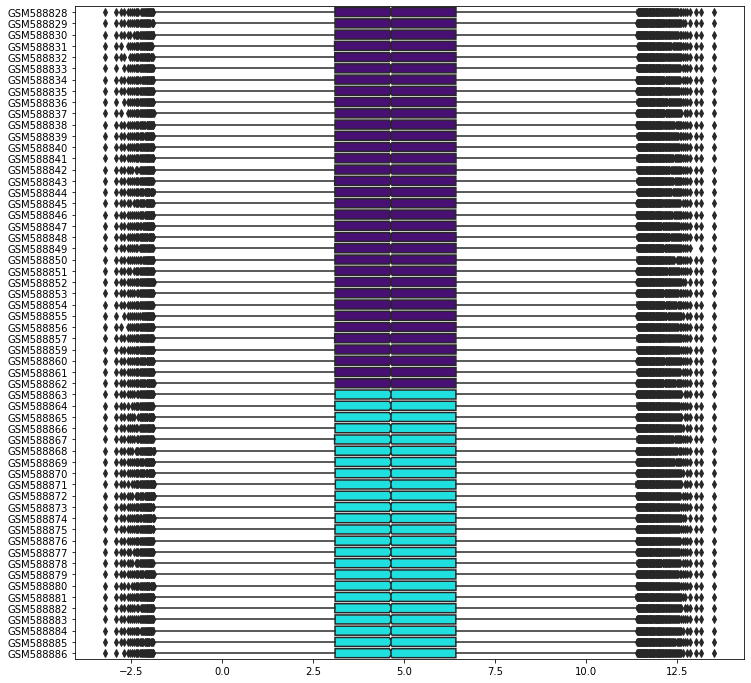

In [10]:
plt.figure(figsize = (12,12))
sns.boxplot(data=expression.iloc[:,:], orient = 'h', color = annotation['source'], palette = color_samples, notch = True)
plt.show()
# normal - aqua
# tumour - indigo

Видно, что данные нормализованы.

"Найдите гены которые имеют разный уровень
экспрессии в норме и раке."

_____________

According to this article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2933223/) that shows us what types of test we may use for gene expression microarray data analysis, let's use t-test.

In [11]:
from scipy import stats

In [12]:
# let's see an example for the 1st gene name 'A1BG'
print(expression.T[annotation['source'] == 'normal']['A1BG'].values, '\n')
a = expression.T[annotation['source'] == 'normal']['A1BG'].values
print(expression.T[annotation['source'] == 'tumour']['A1BG'].values)
b = expression.T[annotation['source'] == 'tumour']['A1BG'].values

[4.51611182 4.79794281 4.59840312 4.57251564 5.57118785 4.57100136
 4.81171991 4.81339516 4.52218883 4.96747271 4.14508028 5.04913425
 4.25305968 4.10864462 3.87063822 4.54053272 4.3099047  4.51928525
 4.42705909 4.58747517 4.49812289 4.28113899 4.49844312 4.22881404] 

[4.13377944 4.19509346 3.98145996 4.39720574 4.11149125 4.32226665
 4.7024108  4.34308723 4.58075038 4.17900054 3.94991679 4.17623584
 4.19850417 4.52388932 4.66830096 4.58962382 4.00236561 4.16339909
 4.36738859 4.98900496 4.54316912 5.33242096 4.32339583 4.61965795
 5.03863936 4.13507061 4.63111974 4.47970289 4.90919882 5.37028375
 4.76903127 5.25226792 4.04733897 4.35666597]


In [13]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=0.6255183471773218, pvalue=0.5341719126056597)

What is p-value in gene expression: the p-value associated with each selected gene can be interpreted as the probability that the two samples are from the same population.

Let's say, the significance level = 0.05, \
The null hypothesis H0: that there is no difference, \
The alternative hypothesis H1: there is difference.

So, in the case of A1BG gene, pv = 0.53 > 0.05 => we assume the null hypothesis that says us that this gene is not significant differentially expressed in the samples.

Let's do it for all genes in the dataset:

In [14]:
p_values = {}

for gene in expression.index:
    p_values[gene] = stats.ttest_ind(a = expression.T[annotation['source'] == 'normal'][gene].values,
                                     b = expression.T[annotation['source'] == 'tumour'][gene].values)[1]

In [15]:
pvals_df = pd.DataFrame.from_dict(p_values.items()).rename(columns = {0:'gene',1:'p_value'}).set_index('gene')
pvals_df.head()

,p_value
gene,
A1BG,0.534172
NAT2,0.000001
ADA,0.005320
CDH2,0.142967
AKT3,0.010043


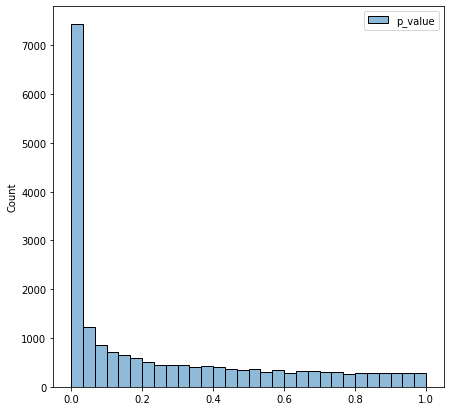

In [16]:
plt.figure(figsize = (7,7))
sns.histplot(pvals_df)
plt.show()

Let's find top 15 genes w/ highest dif. in gene expression between normal and tumour samples.

In [17]:
pvals_df.sort_values(by = 'p_value', ascending = True).head(15)

,p_value
gene,
CDH3,4.847791e-27
ETV4,1.193213e-25
PLP1,4.391442e-24
LGI1,2.238089e-23
FOXQ1,9.641333e-23
ESM1,1.867996e-22
MAMDC2,9.641302e-22
MYOT,4.357836e-21
HILPDA,5.518788e-21


"Экспрессия скольких генов статистически
достоверно различается между раком и нормой?"

In [18]:
pvals = pvals_df.to_numpy()
pvals = pvals.flatten()
pvals

array([5.34171913e-01, 1.22242024e-06, 5.31986165e-03, ...,
       6.71941552e-01, 1.73594273e-02, 2.07064715e-01])

In [19]:
from statsmodels.stats.multitest import multipletests

bonferroni = multipletests(pvals, method='bonferroni', alpha=0.05)

In [20]:
(reject_hypothesis, pvals_corrected, alphacSidak, alphacBonf) = bonferroni
# alphacBonf - corrected alpha for Bonferroni method

In [21]:
bonferroni_df = pd.DataFrame({'reject_hypothesis':reject_hypothesis,
                              'pvals_corrected':pvals_corrected})
bonferroni_df.head()

,reject_hypothesis,pvals_corrected
0,False,1.00000
1,True,0.02415
2,False,1.00000
3,False,1.00000
4,False,1.00000


In [22]:
bonferroni_df['gene'] = pvals_df.index
first_column = bonferroni_df.pop('gene')
bonferroni_df.insert(0, 'gene', first_column)
bonferroni_df['pvals'] = pvals_df['p_value'].values
bonferroni_df

,gene,reject_hypothesis,pvals_corrected,pvals
0,A1BG,False,1.00000,0.534172
1,NAT2,True,0.02415,0.000001
2,ADA,False,1.00000,0.005320
3,CDH2,False,1.00000,0.142967
4,AKT3,False,1.00000,0.010043
...,...,...,...,...
19751,PTBP3,False,1.00000,0.007541
19752,KCNE2,False,1.00000,0.053672
19753,DGCR2,False,1.00000,0.671942
19754,CASP8AP2,False,1.00000,0.017359


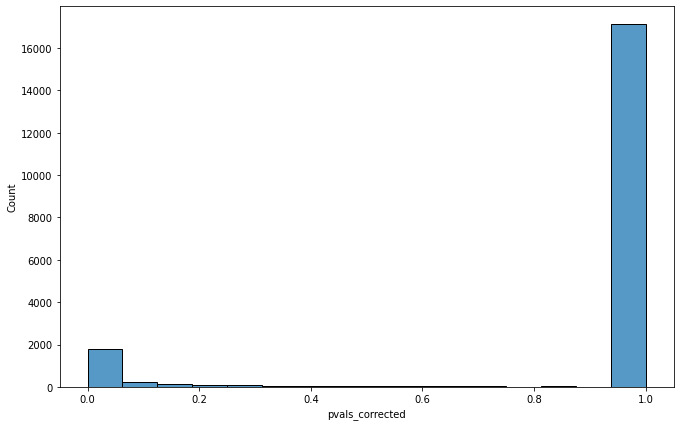

In [23]:
plt.figure(figsize = (11,7))
sns.histplot(data=bonferroni_df['pvals_corrected'])
plt.show()

In [24]:
bonferroni_df['reject_hypothesis'].value_counts()

False    18017
True      1739
Name: reject_hypothesis, dtype: int64

After the Bonferroni correction usage, the num. of genes becomes 1739 (that have dif. in gene expression).

## Задание 2.

"Получить состав пасвеев (KEGG или GO) используя, например, ресурс MSigDB 
или любым другим
способом. Реализовать простой анализ перепредставленности, используя
как вход дифференциально экспрессированные гены. Сравнить с
результатами, которые выдаст WebGestaldt или аналогичный софт.


Рекомендации – удалять слишком маленькие (<5) и слишком большие (>500)
genesets. Также можно убрать из входа все гены, которые не встречаются
хотя бы в одном geneset."
______
_KEGG pathway_ is a collection of manually drawn pathway maps representing our knowledge of the molecular interaction, reaction and relation networks for metabolism, human diseases, etc. 

_Gene Ontology (GO)_ knowledgebase is the world’s largest source of information on the functions of genes. This knowledge is both human-readable and machine-readable, and is a foundation for computational analysis of large-scale molecular biology and genetics experiments in biomedical research.


The needed geneset were downloaded from https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#H: (gene symbols).

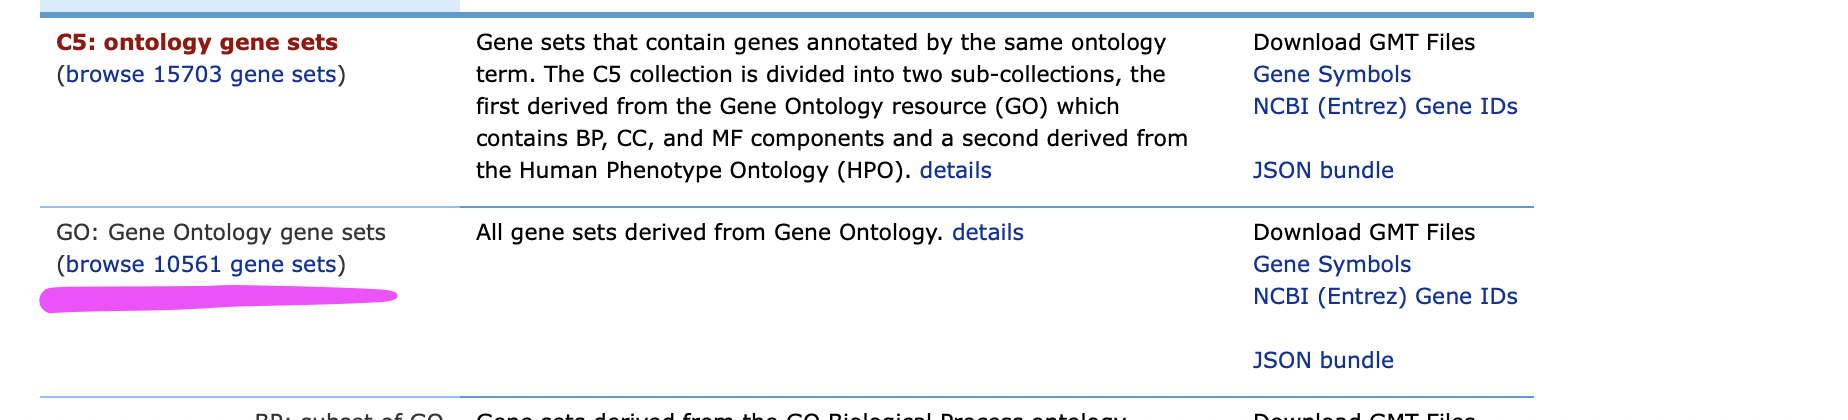

In [27]:
gene_sets_file = 'c5.go.v2022.1.Hs.symbols.gmt'

gene_sets = []

with open(gene_sets_file, 'r') as f:
    lines = f.readlines()

for line in lines:
    gene_sets.append(line.strip().split('\t'))

In [31]:
# number of genesets
len(gene_sets)

10561

In [32]:
# data filtering
gene_setss = []

for gene_set in gene_sets:
    if (len(gene_set) > 5) & (len(gene_set) < 500):
        gene_setss.append(gene_set)

In [33]:
print(len(gene_setss))
print(gene_setss[3])

10186
['GOBP_REGULATION_OF_MITOTIC_RECOMBINATION', 'http://www.gsea-msigdb.org/gsea/msigdb/human/geneset/GOBP_REGULATION_OF_MITOTIC_RECOMBINATION', 'RAD50', 'ANKLE1', 'ZSCAN4', 'ERCC2', 'MLH1', 'MRE11', 'TERF2']


In [34]:
# Over-representation (or enrichment) analysis

genes = list(expression.index) 
len(genes) # num. of genes in the micro array dataset
# so, let's decrease num. of genes, its too high.. (according to stat. significance results)

19756

In [35]:
#.. to 1739 genes.
bonferroni_df[bonferroni_df['reject_hypothesis'] == True].shape

(1739, 4)

In [36]:
# the gene list is
df = bonferroni_df[bonferroni_df['reject_hypothesis'] == True]
df

,gene,reject_hypothesis,pvals_corrected,pvals
1,NAT2,True,2.415013e-02,1.222420e-06
8,NAALAD2,True,1.220723e-04,6.178998e-09
14,GNPDA1,True,4.248684e-04,2.150579e-08
17,CDH3,True,9.577297e-23,4.847791e-27
31,C8orf88,True,3.029722e-04,1.533571e-08
...,...,...,...,...
19696,JOSD1,True,1.352781e-04,6.847443e-09
19699,KIAA0020,True,2.566403e-02,1.299050e-06
19700,P2RY14,True,2.657010e-09,1.344913e-13
19705,CDC25B,True,2.553424e-08,1.292480e-12


In [37]:
gene_list = list(df.gene)

One class of enrichment analysis methods seek to identify those gene sets that share an unusually large number of genes with a list derived from experimental measurements. \
Fisher’s Exact Test is a classic statistical test for determining what ‘unusually large’ might be. \
More inf.: https://www.pathwaycommons.org/guide/primers/statistics/fishers_exact_test/

In [38]:
# example how to do 
gene_set = gene_setss[1]
gene_set, len(set(gene_set) & set(gene_list)) # 0 intersections /genes

(['GOBP_SINGLE_STRAND_BREAK_REPAIR',
  'http://www.gsea-msigdb.org/gsea/msigdb/human/geneset/GOBP_SINGLE_STRAND_BREAK_REPAIR',
  'XNDC1N',
  'ERCC8',
  'PARP1',
  'APLF',
  'ERCC6',
  'SIRT1',
  'LIG4',
  'APTX',
  'TDP1',
  'TERF2',
  'TNP1',
  'XRCC1'],
 0)

In [39]:
# f.
def fisher_t(geneset, gene_list):
  de_genes = len(set(geneset) & set(gene_list))
  contingency_table = [
      [len(gene_list),len(genes)-len(gene_list)], # 1739 DE genes, 19756-1739 not DE genes in the microarray data
      [de_genes,len(gene_set[0:])-de_genes]]
  return len(set(geneset) & set(gene_list)), len(geneset), stats.fisher_exact(contingency_table, alternative = 'less')[1]

In [40]:
fisher_t(gene_set, gene_list) 
# 0 genes are DE out of this geneset, p.value

(0, 14, 1.0)

In [41]:
de_genes_dict = {}

for gene_set in gene_setss:
    de_genes_dict[gene_set[0]] = [*fisher_t(gene_set, gene_list)]

In [42]:
pathways_df = pd.DataFrame(de_genes_dict)
pathways_df = pathways_df.T
pathways_df = pathways_df.rename(columns = {0: 'DE_Genes', 1: 'Genes', 2: 'p_value'})
pathways_df['DE_Genes'] = pathways_df['DE_Genes'].astype(int)
pathways_df['Genes'] = pathways_df['Genes'].astype(int)
pathways_df

,DE_Genes,Genes,p_value
GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,4,34,0.351310
GOBP_SINGLE_STRAND_BREAK_REPAIR,0,14,1.000000
GOBP_REGULATION_OF_DNA_RECOMBINATION,9,135,0.848751
GOBP_REGULATION_OF_MITOTIC_RECOMBINATION,0,9,1.000000
GOBP_MITOTIC_SPINDLE_ELONGATION,5,14,0.005396
...,...,...,...
GOMF_RNA_ADENYLYLTRANSFERASE_ACTIVITY,0,9,1.000000
GOMF_SEQUENCE_SPECIFIC_MRNA_BINDING,1,16,0.771104
GOMF_PROMOTER_SPECIFIC_CHROMATIN_BINDING,9,65,0.116088
GOMF_SPLICING_FACTOR_BINDING,0,7,1.000000


In [43]:
pathways_df = pathways_df.sort_values(by = 'p_value', ascending = True)
pathways_df.head()

,DE_Genes,Genes,p_value
GOBP_SISTER_CHROMATID_SEGREGATION,56,243,3.146235e-11
GOBP_CHROMOSOME_SEGREGATION,75,386,1.266783e-10
GOBP_MITOTIC_NUCLEAR_DIVISION,65,330,1.087770e-09
GOCC_PRERIBOSOME,26,78,1.450047e-09
GOBP_RIBOSOME_BIOGENESIS,62,312,1.777534e-09


In [44]:
pvals = pathways_df['p_value'].to_numpy()
pvals = pvals.flatten()
pvals

array([3.14623525e-11, 1.26678304e-10, 1.08776952e-09, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [45]:
bonferroni = multipletests(pvals, method='bonferroni', alpha=0.05)

In [46]:
(reject_hypothesis, pvals_corrected, alphacSidak, alphacBonf) = bonferroni

In [47]:
bonferroni_df = pd.DataFrame({'reject_hypothesis':reject_hypothesis,
                              'pvals_corrected':pvals_corrected})
bonferroni_df.head()

,reject_hypothesis,pvals_corrected
0,True,3.204755e-07
1,True,1.290345e-06
2,True,1.108002e-05
3,True,1.477018e-05
4,True,1.810596e-05


In [51]:
bonferroni_df['pathway'] = pathways_df.index
first_column = bonferroni_df.pop('pathway')
bonferroni_df.insert(0, 'pathway', first_column)
bonferroni_df['DE_Genes'] = pathways_df['DE_Genes'].values
bonferroni_df['Genes'] = pathways_df['Genes'].values
bonferroni_df['p_value'] = pathways_df['p_value'].values
bonferroni_df.head()

,pathway,reject_hypothesis,pvals_corrected,DE_Genes,Genes,p_value
0,GOBP_SISTER_CHROMATID_SEGREGATION,True,3.204755e-07,56,243,3.146235e-11
1,GOBP_CHROMOSOME_SEGREGATION,True,1.290345e-06,75,386,1.266783e-10
2,GOBP_MITOTIC_NUCLEAR_DIVISION,True,1.108002e-05,65,330,1.087770e-09
3,GOCC_PRERIBOSOME,True,1.477018e-05,26,78,1.450047e-09
4,GOBP_RIBOSOME_BIOGENESIS,True,1.810596e-05,62,312,1.777534e-09


In [49]:
bonferroni_df[bonferroni_df['reject_hypothesis'] == True].shape # 27 genesets have -> reject hypothesis 0

(27, 6)

In [52]:
bonferroni_df[bonferroni_df['reject_hypothesis'] == True]

,pathway,reject_hypothesis,pvals_corrected,DE_Genes,Genes,p_value
0,GOBP_SISTER_CHROMATID_SEGREGATION,True,3.204755e-07,56,243,3.146235e-11
1,GOBP_CHROMOSOME_SEGREGATION,True,1.290345e-06,75,386,1.266783e-10
2,GOBP_MITOTIC_NUCLEAR_DIVISION,True,1.108002e-05,65,330,1.087770e-09
3,GOCC_PRERIBOSOME,True,1.477018e-05,26,78,1.450047e-09
4,GOBP_RIBOSOME_BIOGENESIS,True,1.810596e-05,62,312,1.777534e-09
5,GOBP_MITOTIC_SPINDLE_ORGANIZATION,True,2.186937e-05,36,137,2.147003e-09
6,GOBP_REGULATION_OF_CHROMOSOME_ORGANIZATION,True,4.353142e-05,53,254,4.273652e-09
7,GOBP_RRNA_METABOLIC_PROCESS,True,5.575190e-05,55,270,5.473385e-09
8,GOBP_NUCLEAR_CHROMOSOME_SEGREGATION,True,9.145838e-05,62,325,8.978832e-09
9,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION_INV...,True,1.773498e-04,39,167,1.741114e-08


In [53]:
# Webgestalt section.
# to load gene names file in Webgestalt
with open('df.txt', 'w') as f:
    gene_file = '\n'.join(gene for gene in gene_list) 
    f.write(gene_file)

_Webgestalt_ means WEB-based GEne SeT AnaLysis Toolkit. It is a functional enrichment analysis web tool ('Translating gene lists into biological insights...').

Let's use such parameters:

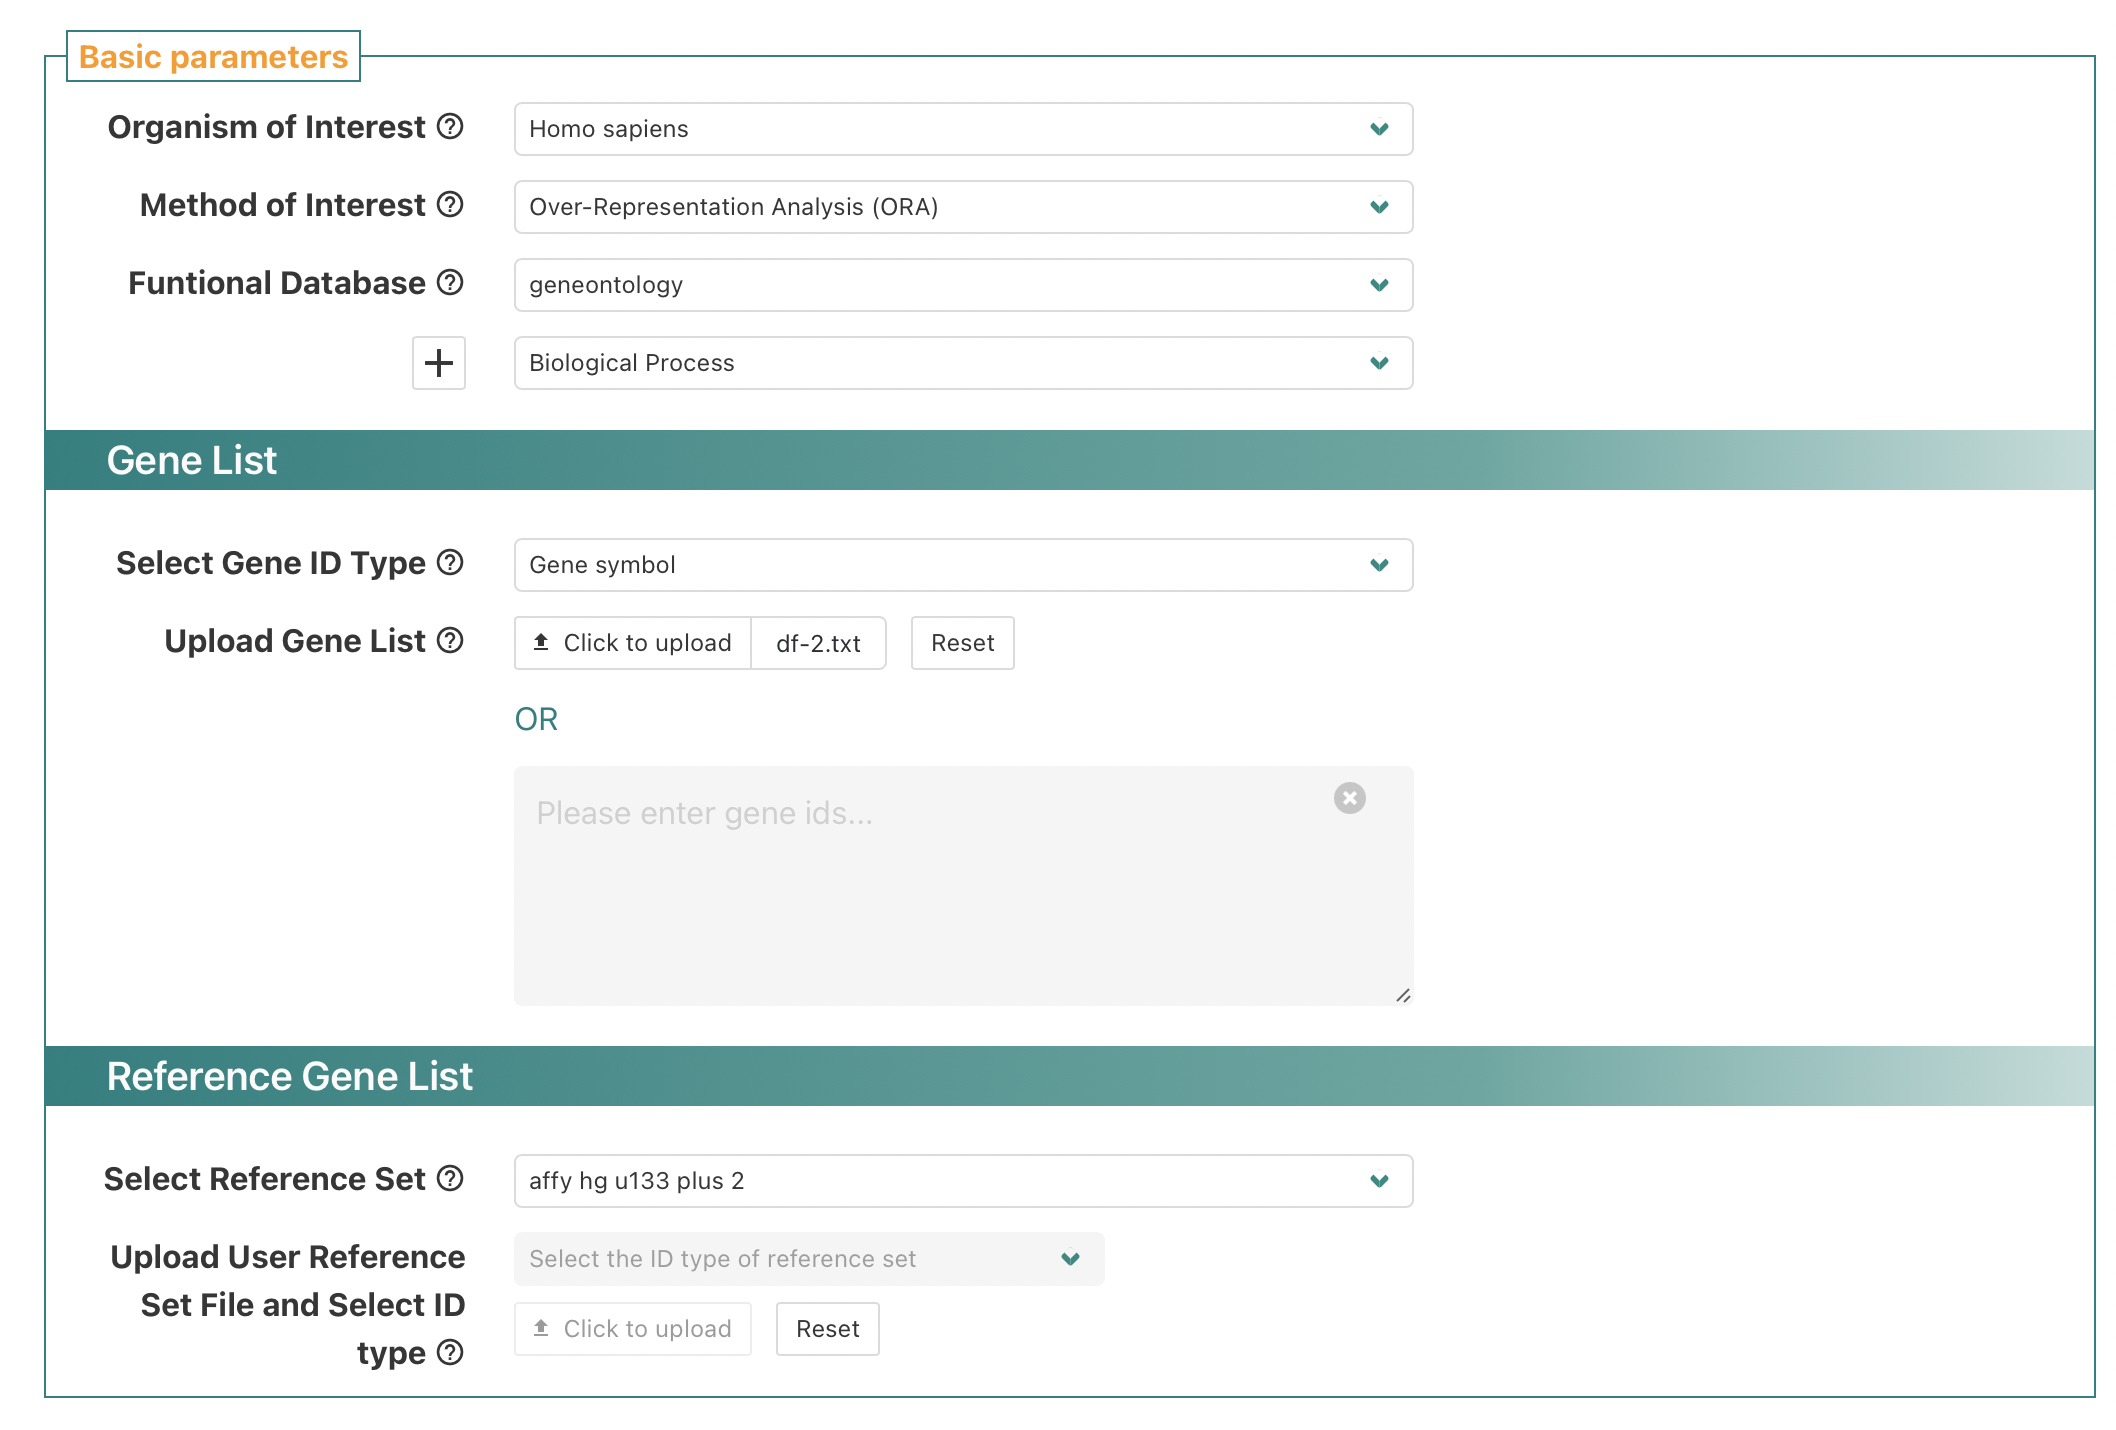

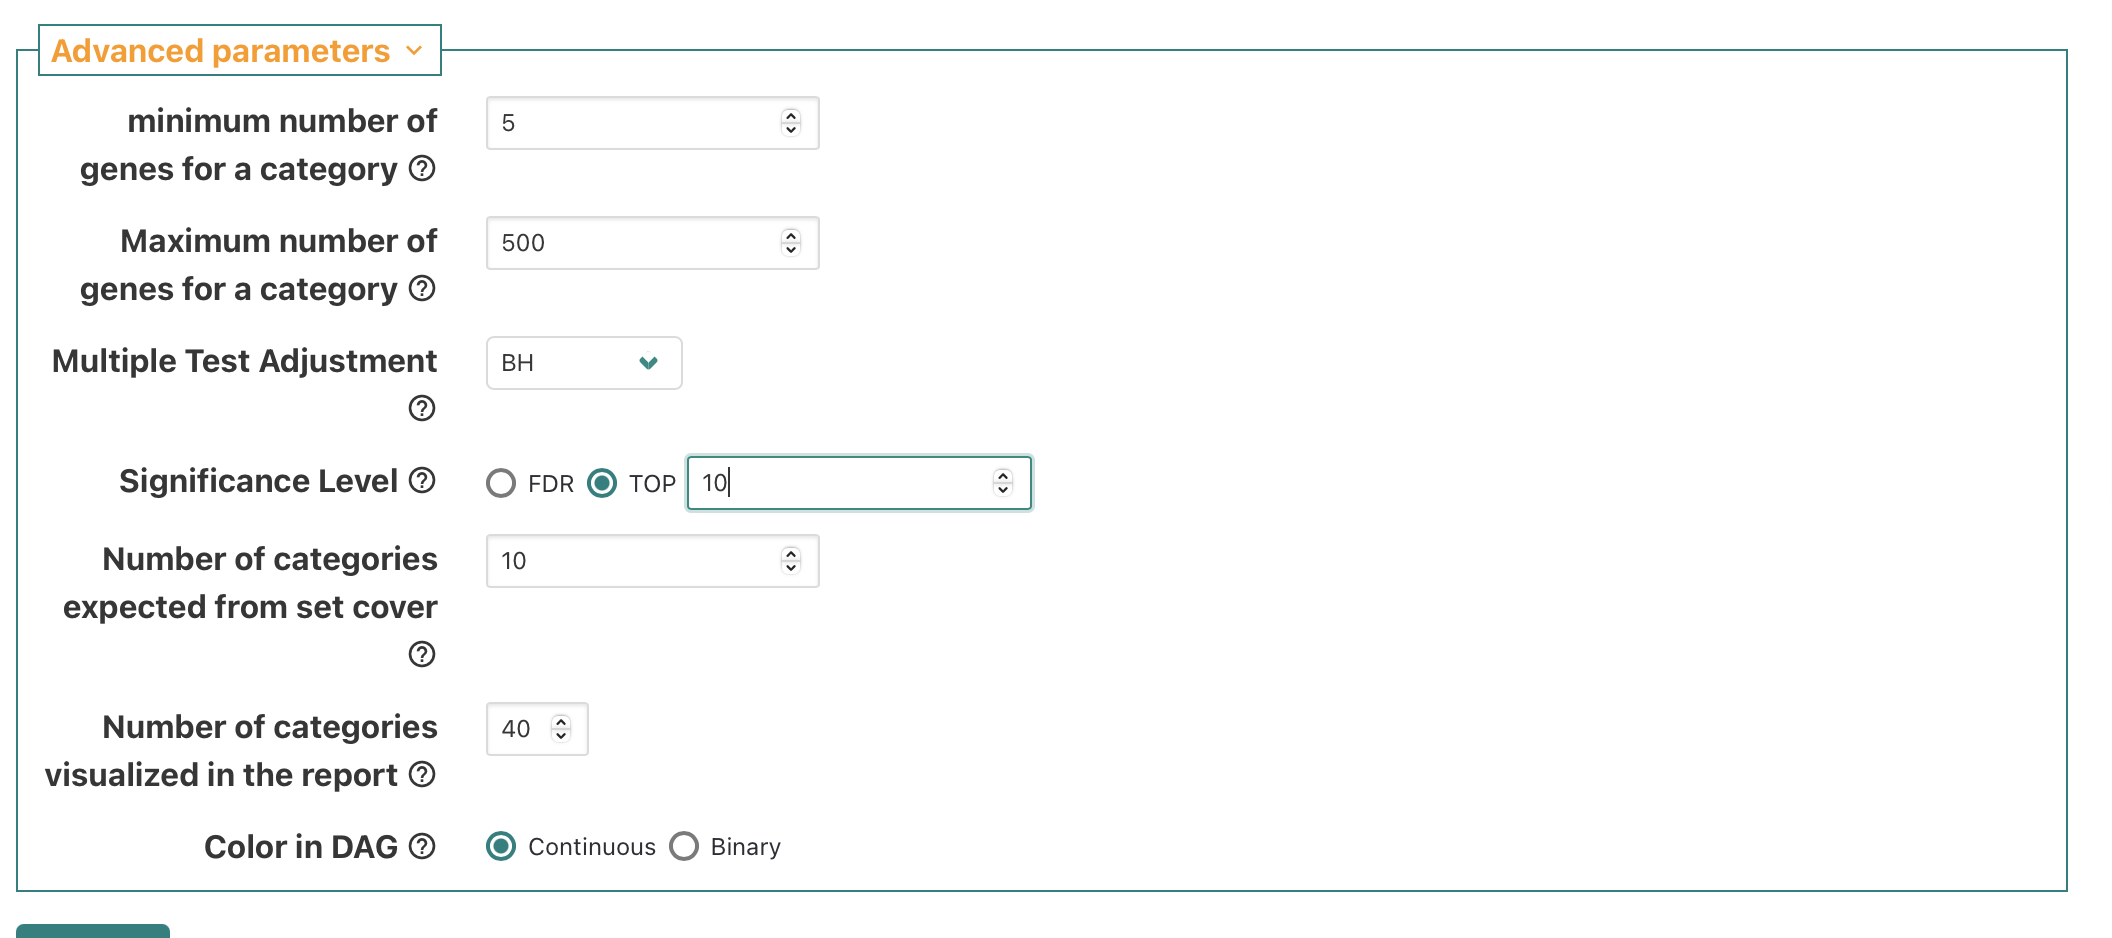

The results page shows us that

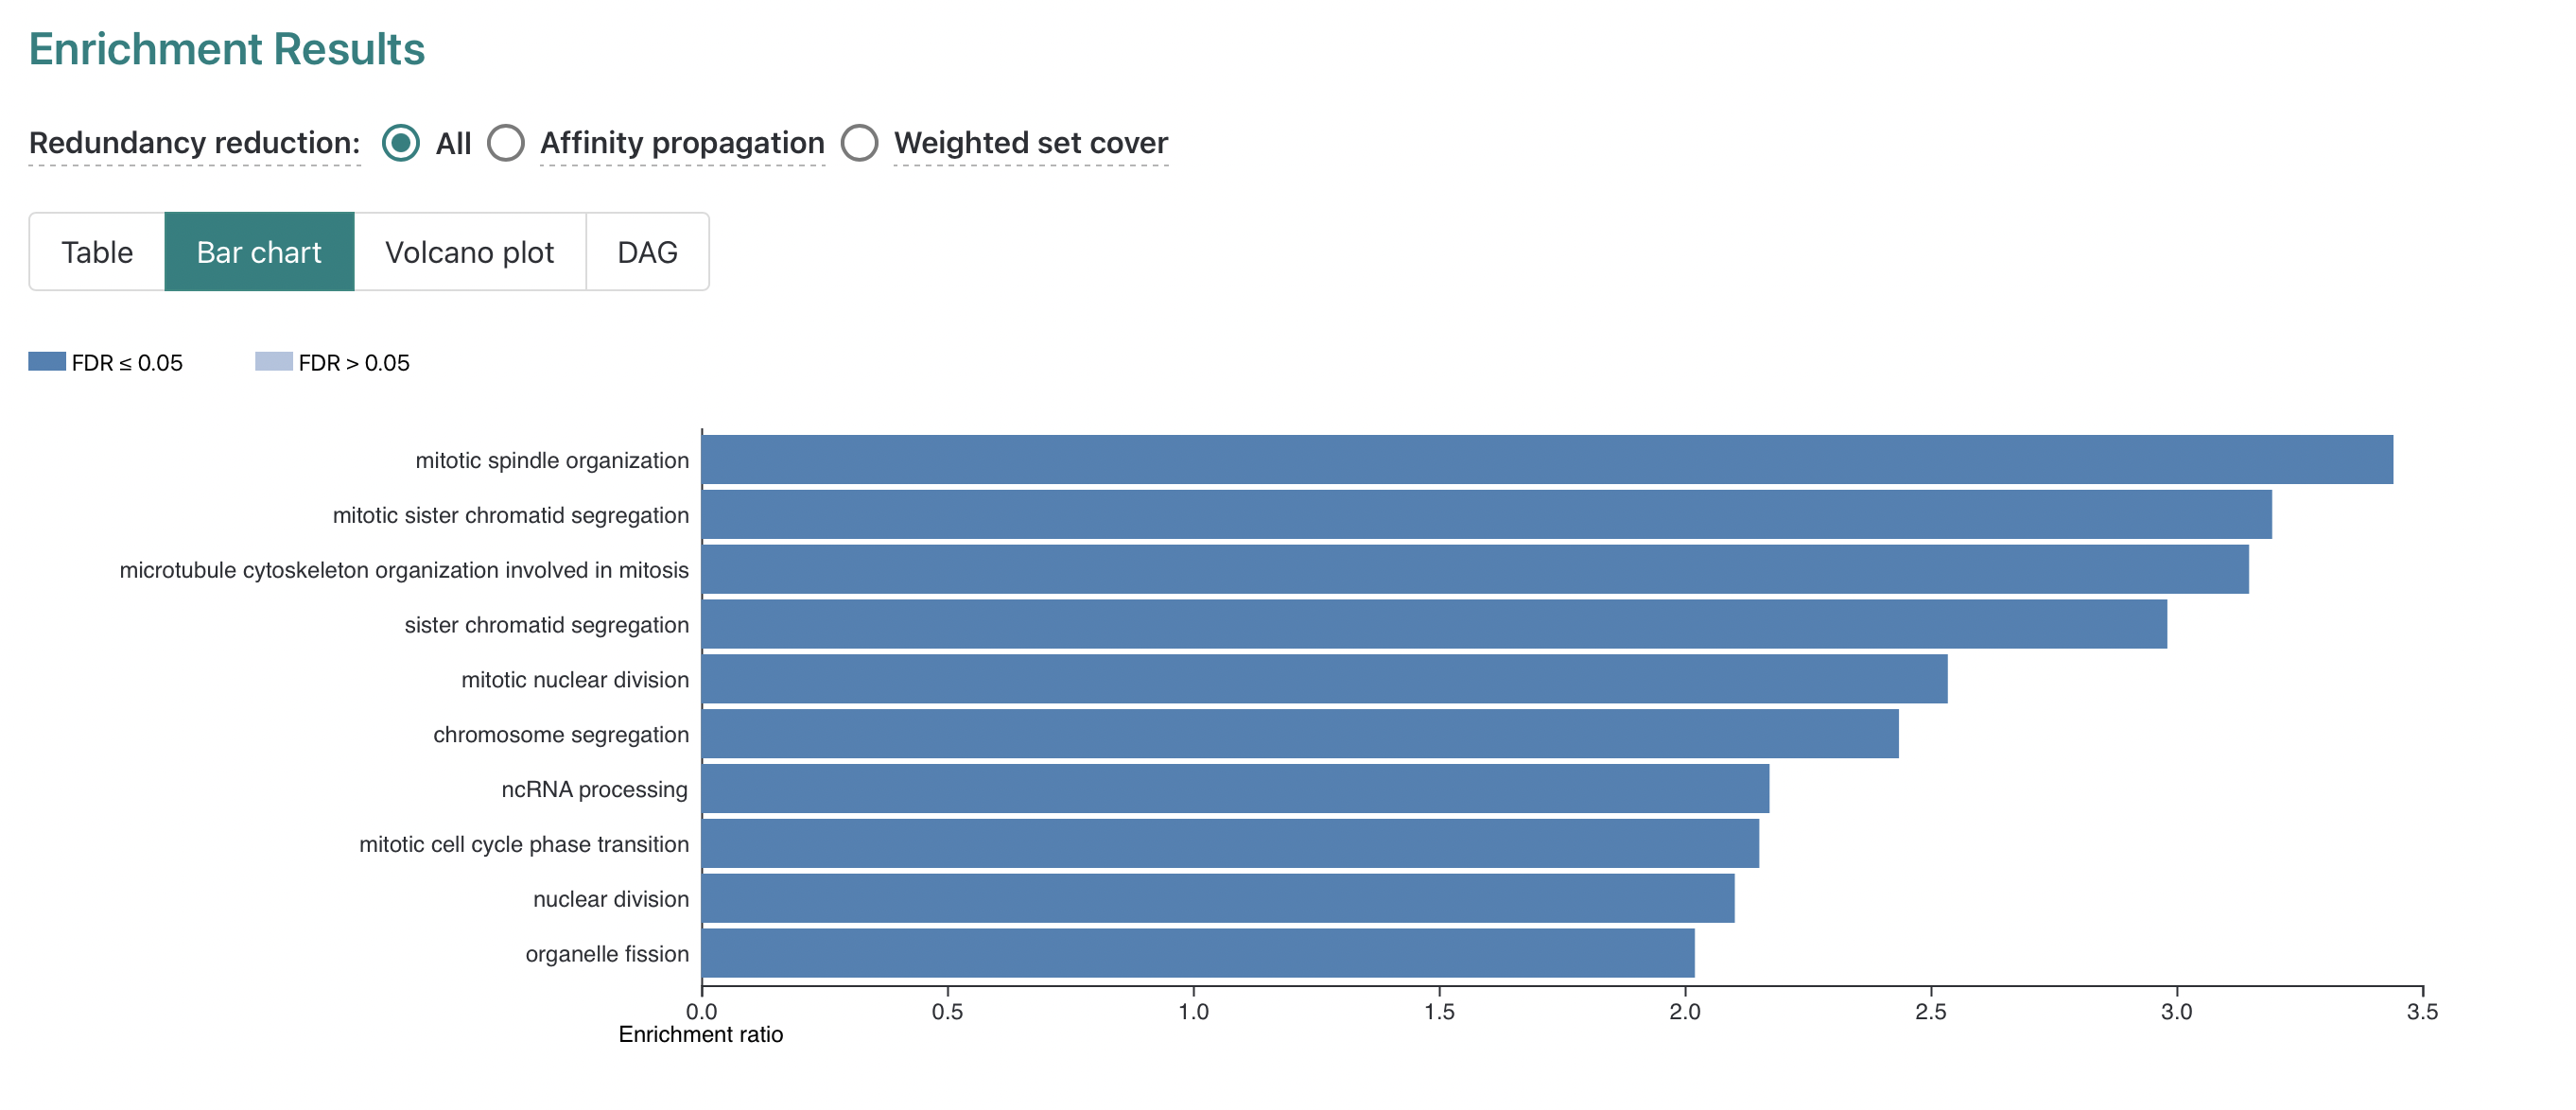

Let's compare it w/ our resulted df:

In [54]:
bonferroni_df[bonferroni_df['reject_hypothesis'] == True].head(10)

,pathway,reject_hypothesis,pvals_corrected,DE_Genes,Genes,p_value
0,GOBP_SISTER_CHROMATID_SEGREGATION,True,3.204755e-07,56,243,3.146235e-11
1,GOBP_CHROMOSOME_SEGREGATION,True,1.290345e-06,75,386,1.266783e-10
2,GOBP_MITOTIC_NUCLEAR_DIVISION,True,1.108002e-05,65,330,1.087770e-09
3,GOCC_PRERIBOSOME,True,1.477018e-05,26,78,1.450047e-09
4,GOBP_RIBOSOME_BIOGENESIS,True,1.810596e-05,62,312,1.777534e-09
5,GOBP_MITOTIC_SPINDLE_ORGANIZATION,True,2.186937e-05,36,137,2.147003e-09
6,GOBP_REGULATION_OF_CHROMOSOME_ORGANIZATION,True,4.353142e-05,53,254,4.273652e-09
7,GOBP_RRNA_METABOLIC_PROCESS,True,5.575190e-05,55,270,5.473385e-09
8,GOBP_NUCLEAR_CHROMOSOME_SEGREGATION,True,9.145838e-05,62,325,8.978832e-09
9,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION_INV...,True,1.773498e-04,39,167,1.741114e-08


We have several matches!

p.s. Видно, что в обоих случаях, pathways ~ с хромосомной организацией. 

p.s.s. Действительно, например, тот же самый pathway с хромосомной сегрегацией (расслоением) хорошо может быть с помощью статьи https://www.nature.com/articles/35101065.

'Mitosis is the most dramatic — and potentially dangerous — event in the cell cycle, as sister chromatids are irreversibly segregated to daughter cells. Defects in the checkpoints that normally maintain the fidelity of this process can lead to chromosomal instability (CIN) and cancer. However, CIN — a driving force of tumorigenesis — could be the cancer cell's ultimate vulnerability. An important goal is to identify novel anticancer compounds that directly target the mitotic errors at the heart of CIN'.

И это только один пример. Думаю, все логично, что выявленные pathways связаны с канцерогенезом.
_________

"Cмысл задания в том, чтобы реализовать enrichment самостоятельно - через 
анализ таблиц сопряженности. Готовыми функциями пользоваться пока не 
надо (это можно будет делать в следующем дз)."